# Permutation Importance Demo

In this notebook, we create a short code for demonstrating how to use Permutation Importance using scikit-learn. The code used in this notebook is adapted from this [scikit-learn documentation](https://scikit-learn.org/stable/modules/permutation_importance.html).

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [11]:
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data,
    diabetes.target, random_state=0)

In [8]:
# Description
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

## Train Model

In [15]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.35666062386954545

The model gives a validation $R^2$ of 0.36. We will now look at how errors change using permutation importance.

## Interpret Model using Permutation Importance

In [16]:
from sklearn.inspection import permutation_importance

In [18]:
perm = permutation_importance(model, X_val, y_val,
                            n_repeats=30, random_state=0)

In [36]:
df_perm = (pd.DataFrame({'importance_mean': perm.importances_mean,
                         'importance_std': perm.importances_std},
                         index=diabetes.feature_names)
                        .sort_values('importance_mean', ascending=False))
df_perm

,importance_mean,importance_std
s5,0.204234,0.049645
bmi,0.175790,0.048404
bp,0.088365,0.032839
sex,0.055874,0.023190
s1,0.042211,0.031413
s4,0.003187,0.008402
s6,0.002787,0.003158
s3,0.002038,0.013093
s2,0.002036,0.002622
age,-0.001993,0.003647


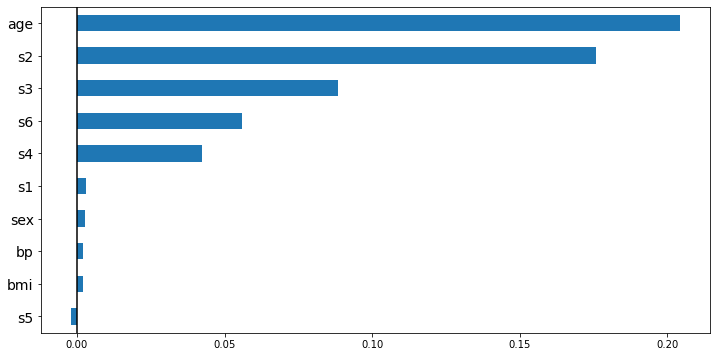

In [59]:
ax = df_perm.importance_mean.sort_values().plot.barh(figsize=(12, 6))
ax.axvline(0, color='k')
ax.set_yticklabels(list(df_perm.index), size=14);

From the plot above, we see the most important features. Also, we see features with minimal impact on the model's predictive power.

Warning: Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but <b>how important this feature is for a particular model</b>.